In [12]:
from transformers import GPT2LMHeadModel

In [13]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M model
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [19]:
from transformers import pipeline
generator = pipeline('text-generation', model='gpt2')
text = generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)
text

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Hello, I'm a language model, so I'm a programming language - I'll play with it and try to understand the code, and it'll help me to write better code. I try to be kind of a nerd. I try to be so kind of a nerd that I can write whatever I want. And I'm so glad I did! So let's talk about this one.\n\nSo, I'm writing this app, and I'm going to build a few things up.\n\nI'm going to make some things different, and I'm going to make some things different (laughs).\n\nSo, I'm going to make some things different, and I'm going to make some things different (laughs). So, I'm going to start making stuff in C. I'm going to make stuff in C. I'm going to start making stuff in C. I'm going to start making stuff in C. I'm going to start making stuff in C. I'm going to start making stuff in C. I'm going to start making stuff in C.\n\nNow, we're going to build this app. We're going to build this app. We're going to build this app. We're going to build this app. We're going to build

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Matplotlib is building the font cache; this may take a moment.


{'val': [(0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800, 15900, 16000, 16100, 16200, 16300, 16400, 16500, 16600, 16700, 16800, 16900, 17000, 17100, 17200, 17300, 17400, 17500, 17600, 17700, 17800, 17900, 18000, 18100, 18200, 18300, 18400, 18500, 1860

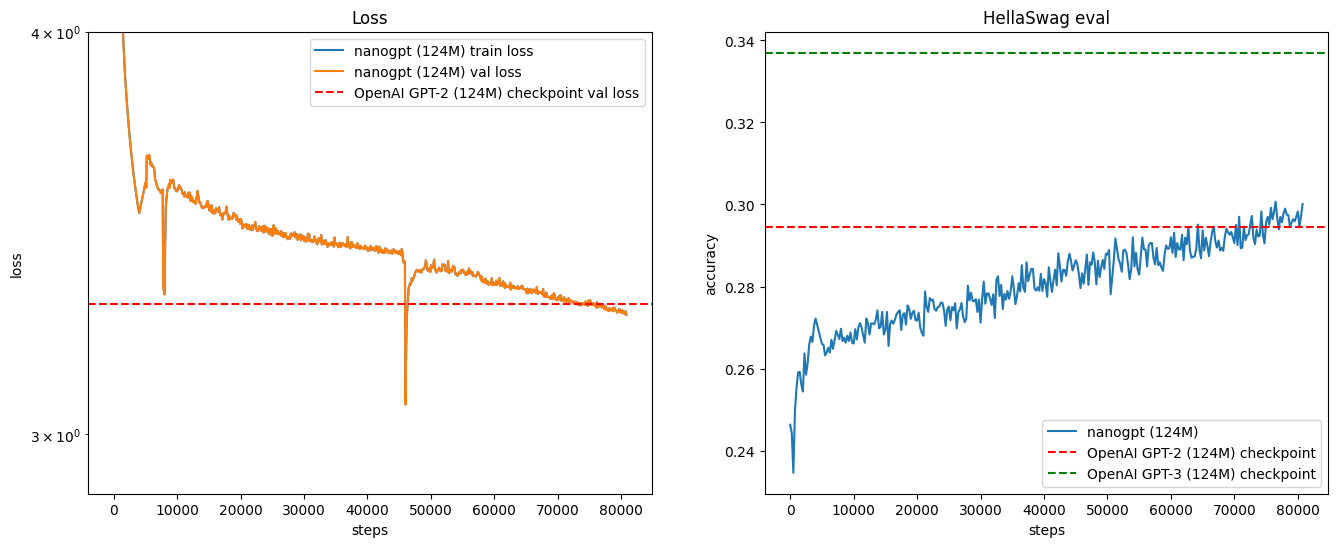

In [20]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()
    
# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)


# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

print(streams_xy)
# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["val"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(top=4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

In [25]:
import torch
import torch
import torch.nn as nn
from torch.nn import functional as F
import math
import tiktoken
import inspect
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist
import os
import numpy as np
import sys
from hellaswag import render_example, iterate_examples
from config import GPTConfig
from transformer import GPT

In [27]:
checkpoint = torch.load("./log/model_81000.pt", map_location=torch.device('cpu'), weights_only=False)
model = GPT(checkpoint['config'])

# Remove _orig_mod. prefix from state dict keys
state_dict = checkpoint['model']
unwrapped_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('_orig_mod.'):
        # Remove the _orig_mod. prefix
        new_key = k[len('_orig_mod.'):]
        unwrapped_state_dict[new_key] = v
    else:
        unwrapped_state_dict[k] = v

# Now load the cleaned state dict
model.load_state_dict(unwrapped_state_dict)
model.eval()
print(f"Model loaded from step {checkpoint['step']}")
print(f"Validation loss: {checkpoint['val_loss']}")

Model loaded from step 81000
Validation loss: 3.26918625831604


In [31]:
enc = tiktoken.get_encoding('gpt2')
num_return_sequences = 5
max_length = 50
tokens = enc.encode("Thomas Edison invented the")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)
sample_rng = torch.Generator()
while tokens.size(1) < max_length:
    with torch.no_grad():
        logits, loss = model(tokens)
        logits = logits[:,-1,:]
        probs = F.softmax(logits, dim=-1)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        ix = torch.multinomial(topk_probs, 1, generator=sample_rng)
        xcol = torch.gather(topk_indices, -1, ix)
        tokens = torch.cat((tokens, xcol), dim=1)

for i in range(num_return_sequences):
    ftokens = tokens[i,:max_length].tolist()
    decoded = enc.decode(ftokens)
    print(">", decoded)


> Thomas Edison invented the light bulb around his 1867 experiments with electricity. He is also credited with developing the power source for the first practical practical motor. Edison is known to have had a hand-to-mouth tooth, but he has not been to
> Thomas Edison invented the first successful steam engine that year, but he never actually made it (although he never used it). He didn’t actually live for the long-term, so he suffered severe heart failure, and was eventually forced to leave
> Thomas Edison invented the filament in 1882, its popularity soared. He became president of Edison Electric Company in 1911 and in 1910, he created the first ever celluloid film camera which we still use today.
These things made celluloids very affordable for
> Thomas Edison invented the light in 1879, but never quite working its vision in real time.
The first major technology to be developed from his work with the glass, the glass to replace steel and to lighten the burden.
In 1911,
> Thomas Edi